In [27]:
#-------------------------------
#  import required dependencies
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

In [28]:
# -------------------------------------
# Load cleand datasets for each country
# -------------------------------------
beninCl = pd.read_csv("../../data/benin-malanville_clean.csv")
sierraLeoneCl = pd.read_csv('../../data/sierraleone-bumbuna_clean.csv')
togoCl = pd.read_csv('../../data/togo-dapaong_qc_clean.csv')

beninCl["Country"] = "Benin"
sierraLeoneCl["Country"] = "Sierra Leone"
togoCl["Country"] = "Togo"
try:
    df = pd.concat([beninCl, sierraLeoneCl, togoCl], ignore_index=True)
    print(f"Cleaned Data Successfully loaded and concat")
    print(df)
except FileNotFoundError:
    print(f"Error: Failed to Load and Concat")
    raise

Cleaned Data Successfully loaded and concat
                   Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0        2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0   
1        2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0   
2        2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3   
3        2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2   
4        2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1   
...                      ...  ...  ...  ...   ...   ...   ...   ...  ...   
1576795  2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
1576796  2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
1576797  2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
1576798  2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
1576799  2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

         WSgust  ...     WD  WDstdev   BP  

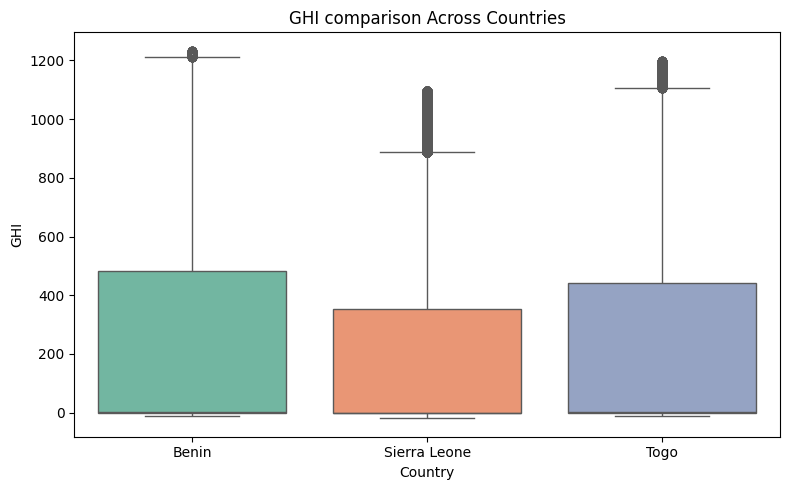

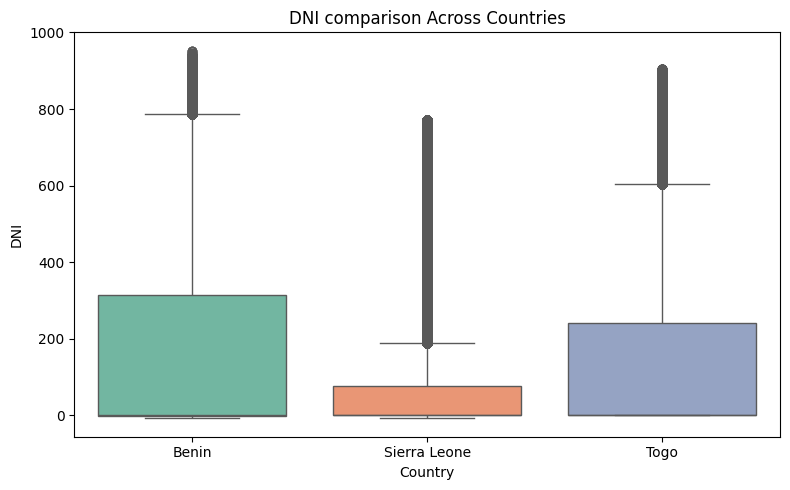

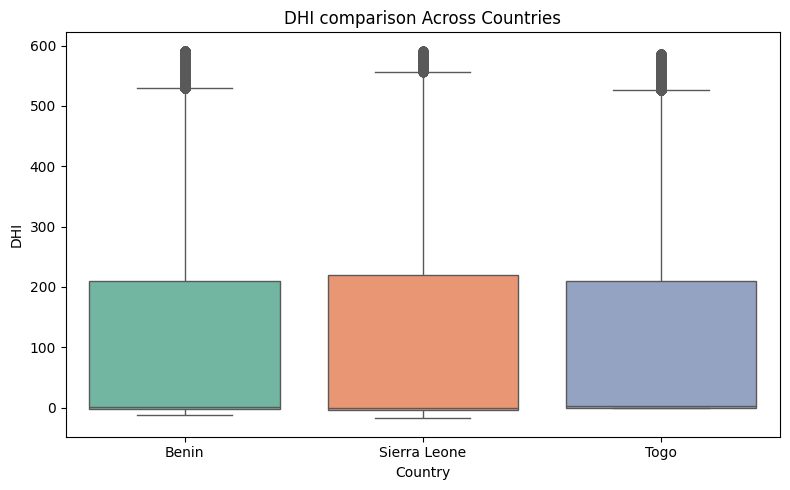

In [29]:
# -------------------------------------
# Create Boxplots for GHI, DNI, DHI
# -------------------------------------

for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x="Country", y=metric,hue="Country", palette="Set2", dodge=False)
    plt.title(f"{metric} comparison Across Countries")
    plt.tight_layout()
    plt.show

In [30]:
# -------------------------------------
# Summary Table (Mean, Median, SD)
# -------------------------------------
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary.columns = ["_".join(col) for col in summary.columns]   # flatten multi index
display(summary)

,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
Country,,,,,,,,,
Benin,240.342811,1.8,330.868308,167.187516,-0.1,261.710501,110.906983,1.6,152.916844
Sierra Leone,196.441990,0.3,291.235290,104.527217,-0.1,201.696328,110.109541,-0.1,154.170508
Togo,229.831936,2.1,321.643747,149.368966,0.0,248.554496,112.408673,2.5,151.292938


In [31]:
# --------------------------------------------------------------------
# Statistical Testing
# Perform one-way ANOVA or Kruskal-Wallis test on GHI across countries
# ---------------------------------------------------------------------
ghi_benin = beninCl["GHI"]
ghi_sierra = sierraLeoneCl["GHI"]
ghi_togo = togoCl["GHI"]

# ANOVA
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("ANOVA p-value:", anova_result.pvalue)

# Kruskal-Wallis (non-parametric alternative)
Kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("Kruskal-Wallis p-value: ", Kruskal_result)

ANOVA p-value: 0.0
Kruskal-Wallis p-value:  KruskalResult(statistic=np.float64(5142.44806972584), pvalue=np.float64(0.0))


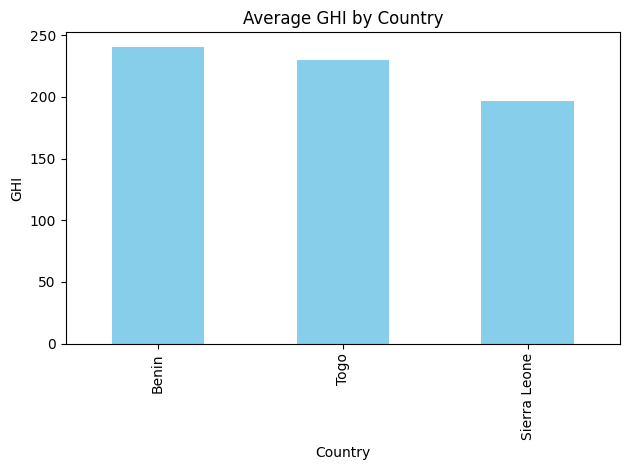

In [32]:
# --------------------------------------------------------------------
# Visual Summary: Bar Chart of Avg GHI
# Simple bar chart ranking countries by average GHI:
# ---------------------------------------------------------------------
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

avg_ghi.plot(kind="bar", color="skyblue", title="Average GHI by Country", ylabel="GHI")
plt.tight_layout()
plt.show()